<a href="https://colab.research.google.com/github/JessieAnce/SCT_ML_01/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-3093102592.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


R² Score: 0.028084138016367333
Mean Squared Error: 991204834716.4655


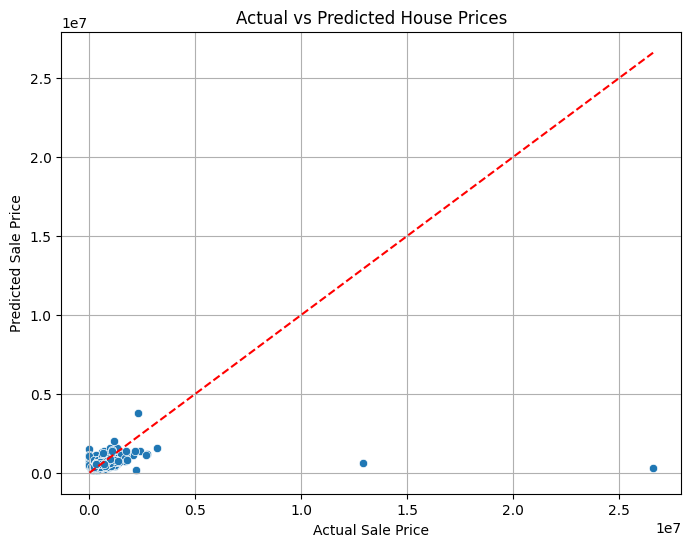


Model Coefficients:
              Coefficient
sqft_living    304.613953
bedrooms    -61954.825037
bathrooms    -3226.337393


In [2]:
# Linear Regression on Kaggle House Prices Dataset
# Predicting house prices using GrLivArea, BedroomAbvGr, and FullBath

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('train.csv')

# Step 2: Select relevant features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'price']
df_selected = df[features]

# Step 3: Drop missing values (if any)
df_selected.dropna(inplace=True)

# Step 4: Define X (features) and y (target)
X = df_selected[['sqft_living', 'bedrooms', 'bathrooms']]
y = df_selected['price']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Step 9: Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.grid(True)
plt.show()

# Step 10: Show model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)